In [116]:
import os
from glob import glob

from multiprocessing import Pool

import pandas as pd
from anndata import AnnData
import scanpy as sc
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import math
import json

Read required genes

In [80]:
genes = pd.read_excel("/mnt/raid62/Lung_cancer_10x/07_gene_drug/gene_drug.xlsx")

genes.head()

,Gene,Symbol,matters,Drug,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,A1CF,A1CF,0,NaN,NaN,NaN,NaN,NaN
1,ALK,CD246,0,NaN,NaN,NaN,NaN,NaN
2,ALKBH3,ALKBH3,1,NaN,NaN,NaN,NaN,NaN
3,ALOX5AP,ALOX5AP,1,NaN,NaN,NaN,NaN,NaN
4,APEH,APEH,1,NaN,NaN,NaN,NaN,NaN


In [5]:
def read_data(args):
    u"""
    read data from paga
    """
    path, genes = args
    
    data = pd.read_csv(os.path.join(path, "scale.csv.gz"), index_col=0, engine="python")
     
    genes = set(genes) & set(data.index)
    
    data = data.loc[genes, :]
    
    meta = pd.read_csv(os.path.join(path, "meta.csv.gz"), index_col=0, engine="python")
    try:
        meta = meta.loc[:, ["res.0.6", "Stage", "Disease"]]
    except KeyError as err:
        print(err)
        print(path)
        print(meta.head())
        
        raise KeyError(err)
    
    cell = os.path.basename(os.path.dirname(path))
    
    meta["Cell"] = [cell.split("_")[0] for x in range(meta.shape[0])]

    return data, meta

Read data

In [33]:
input_dir = "/mnt/raid62/Lung_cancer_10x/02_figures_each_cell"
n_jobs = 20

files = glob(os.path.join(input_dir, "*_ADC/paga"))
files += glob(os.path.join(input_dir, "*_SCC/paga")) 

with Pool(n_jobs) as p:
    res = p.map(read_data, [[x, genes["Symbol"]] for x in files])

In [34]:
data, meta = [], []

for i in res:
    data.append(i[0])
    meta.append(i[1])

data = pd.concat(data, axis=1)
meta = pd.concat(meta)

In [35]:
data.head()

,2018jz1_ATTGGACTCAGCATGT-1,2018jz1_ATTGGACCACTCGACG-1,2018jz1_ATTGGACCAAACGTGG-1,2018jz1_ATCATCTCATTTGCTT-1,2018jz1_ATTGGTGCAGACTCGC-1,2018jz1_ATCATGGAGGTGATAT-1,2018jz1_ATTGGTGAGTGCTGCC-1,2018jz1_GATCGATGTGACGCCT-1,2018jz1_ATTCTACGTGATAAGT-1,2018jz1_ATTGGTGTCTTGAGGT-1,...,AK660_GCGCCAAGTCCGAAGA-1,AK660_GGTATTGTCGTGGTCG-1,AK660_TCACAAGAGCCCTAAT-1,AK661_GCGCCAAGTCCGAAGA-1,AK661_GGTATTGTCGTGGTCG-1,AK661_GGGAATGCAGCAGTTT-1,AK661_CAGAATCCATGCTAGT-1,AK661_CCTTCCCAGGCTAGCA-1,AK661_TCACAAGAGCCCTAAT-1,AK661_GACGTTAGTTAGATGA-1
KRAS,-0.550086,-0.573209,-0.632945,-0.576709,0.668368,-0.523537,-0.551827,-0.562469,-0.561662,-0.599864,...,-0.846551,-0.635688,1.375541,-0.778154,-0.612503,0.854439,-0.596965,-0.614860,1.263019,0.609171
TNFRSF9,-0.097865,-0.214513,-0.568595,-0.256430,-0.252454,-0.055241,-0.116556,-0.169549,-0.160894,-0.381590,...,-0.558807,-0.354875,-0.397692,-0.472644,-0.334656,-0.341417,-0.302430,-0.354378,-0.415495,-0.387903
CHAMP1,-0.178663,-0.264299,0.936029,-0.292748,-0.288022,-0.138619,-0.191435,-0.230406,-0.224491,-0.383833,...,-0.068269,-0.186711,-0.247230,-0.090132,-0.201557,-0.229746,-0.196057,-0.214662,-0.259277,-0.257997
COX10,7.834731,-0.214799,-0.360186,-0.229481,3.324629,-0.133254,-0.171139,-0.194103,-0.191012,-0.282317,...,0.123874,-0.102329,-0.347337,0.124835,-0.135383,-0.237901,-0.088172,-0.197637,-0.404278,-0.375600
MX1,4.712058,1.847944,0.828281,-0.658806,-0.645879,-0.328814,-0.451667,-0.532384,1.867649,-0.845796,...,0.003692,-0.386093,-0.597990,-0.064054,-0.435411,-0.532970,-0.413700,-0.482200,-0.640974,2.376357


In [36]:
meta.columns = ["Cluster", "Stage", "Disease", "Cell"]
meta.head()

,Cluster,Stage,Disease,Cell
2018jz1_ATTGGACTCAGCATGT-1,9,II,ADC,Monocytes
2018jz1_ATTGGACCACTCGACG-1,8,II,ADC,Monocytes
2018jz1_ATTGGACCAAACGTGG-1,1,II,ADC,Monocytes
2018jz1_ATCATCTCATTTGCTT-1,2,II,ADC,Monocytes
2018jz1_ATTGGTGCAGACTCGC-1,8,II,ADC,Monocytes


Construct AnnData and plot

In [37]:
adata = AnnData(data.transpose(), obs = meta)
adata.obs = meta
adata

AnnData object with n_obs × n_vars = 65938 × 79 
    obs: 'Cluster', 'Stage', 'Disease', 'Cell'

1. violin plot by different cells and disease

... storing 'ident' as categorical


saving figure to file ./figures/stacked_violin.pdf


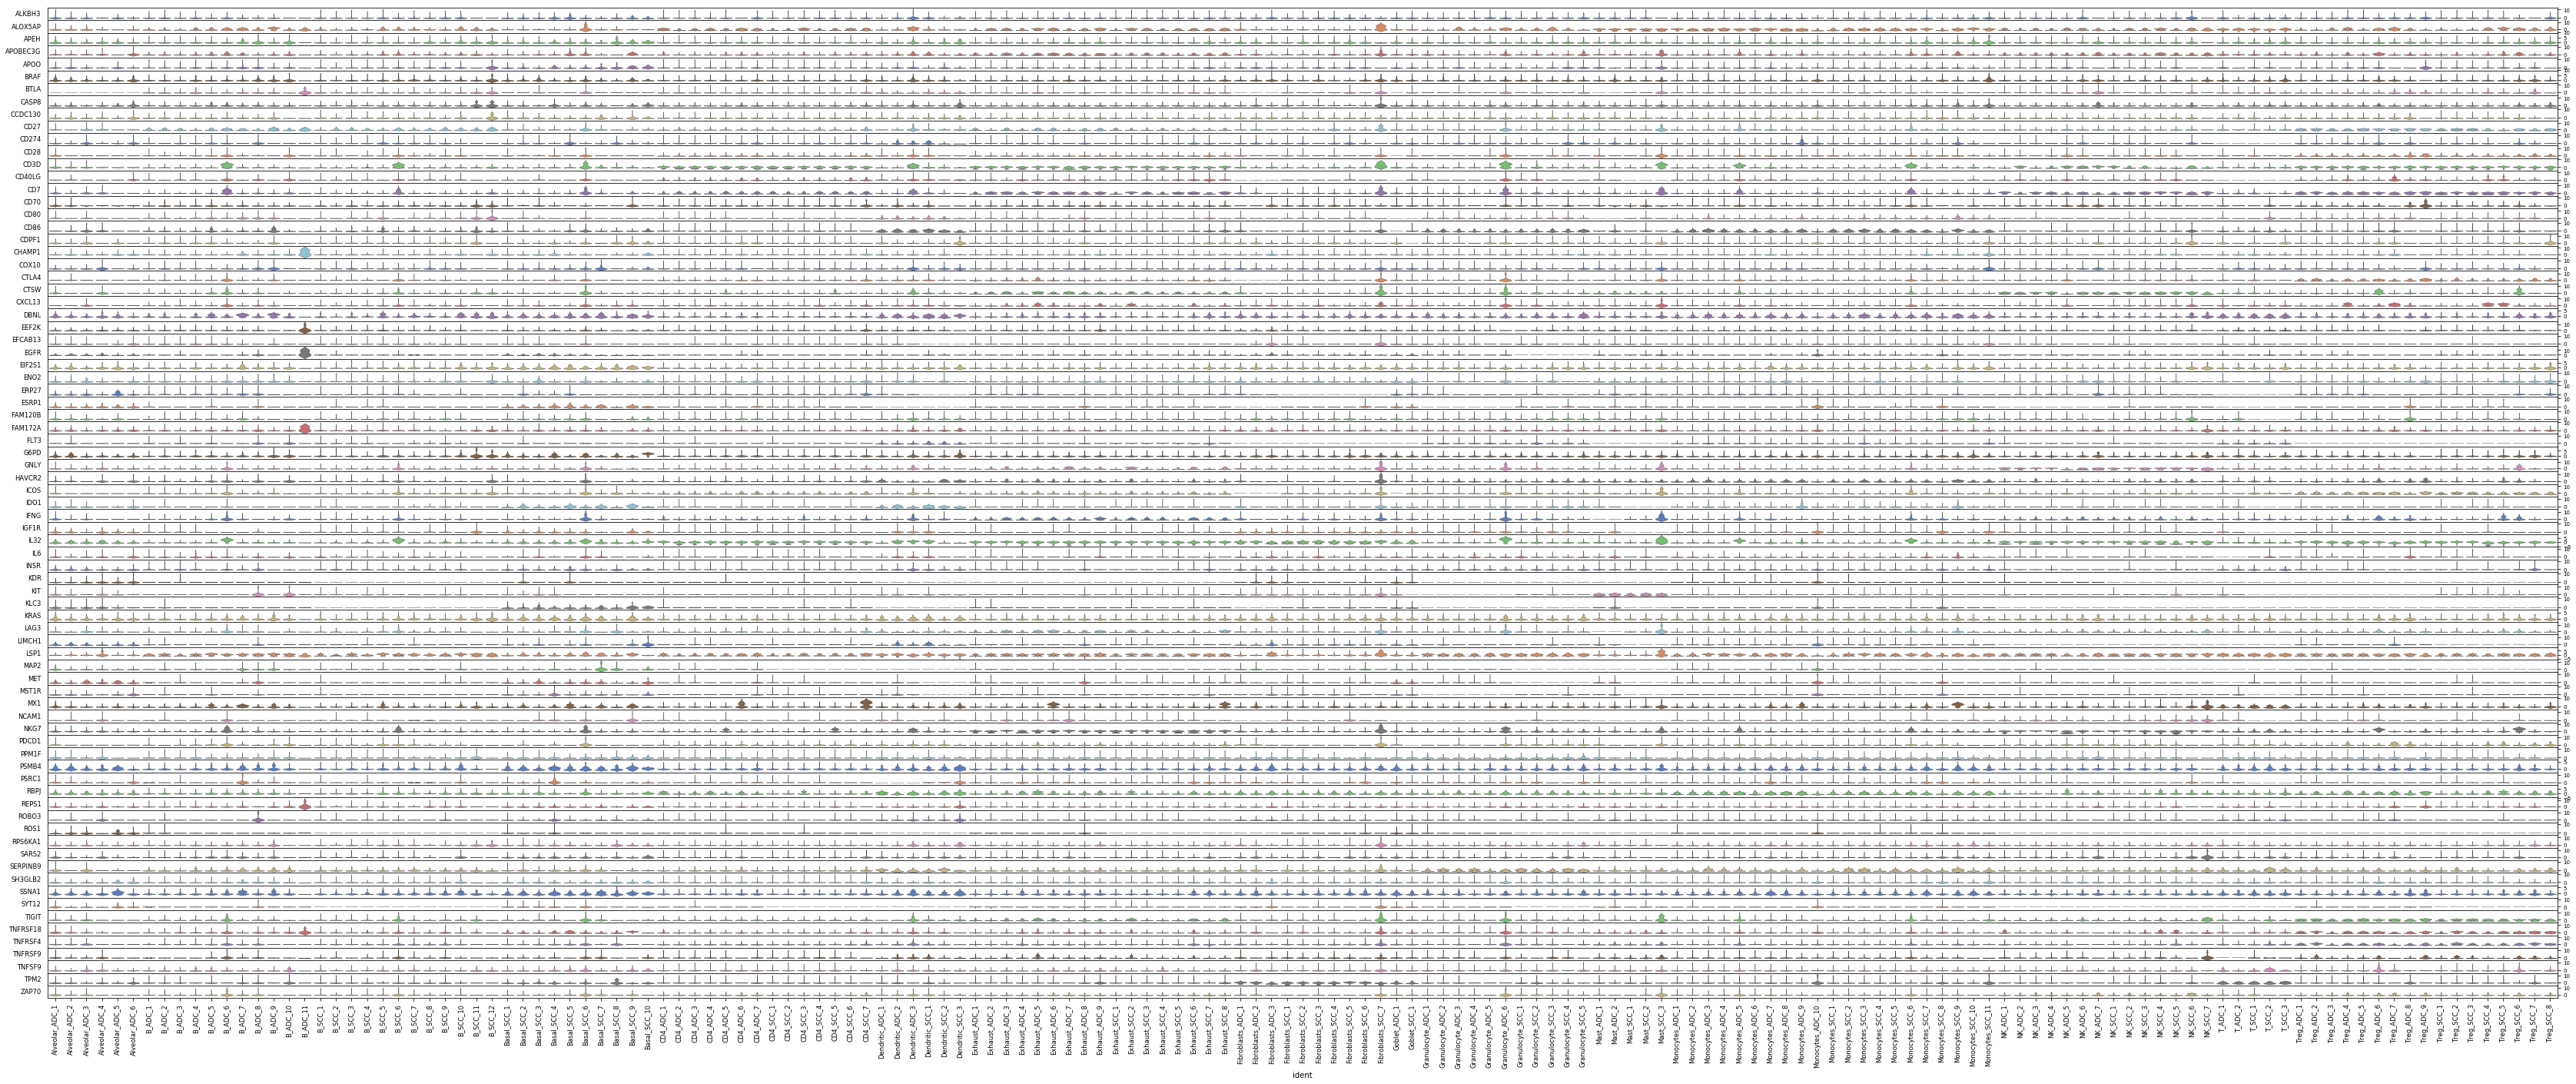

In [39]:
adata.obs["ident"] = ["{0}_{1}_{2}".format(x["Cell"], x["Disease"], x["Cluster"]) for _, x in adata.obs.iterrows()]

# fig = plt.figure()
sc.pl.stacked_violin(
    adata, 
    var_names=sorted(adata.var_names), 
    groupby="ident", 
    log=False,
    swap_axes = True,
    save=".pdf"
)
# plt.tight_layout()

# plt.savefig("/mnt/raid62/Lung_cancer_10x/07_gene_drug/drug_gene_violin.png", dpi = 300)

saving figure to file ./figures/stacked_violin.pdf


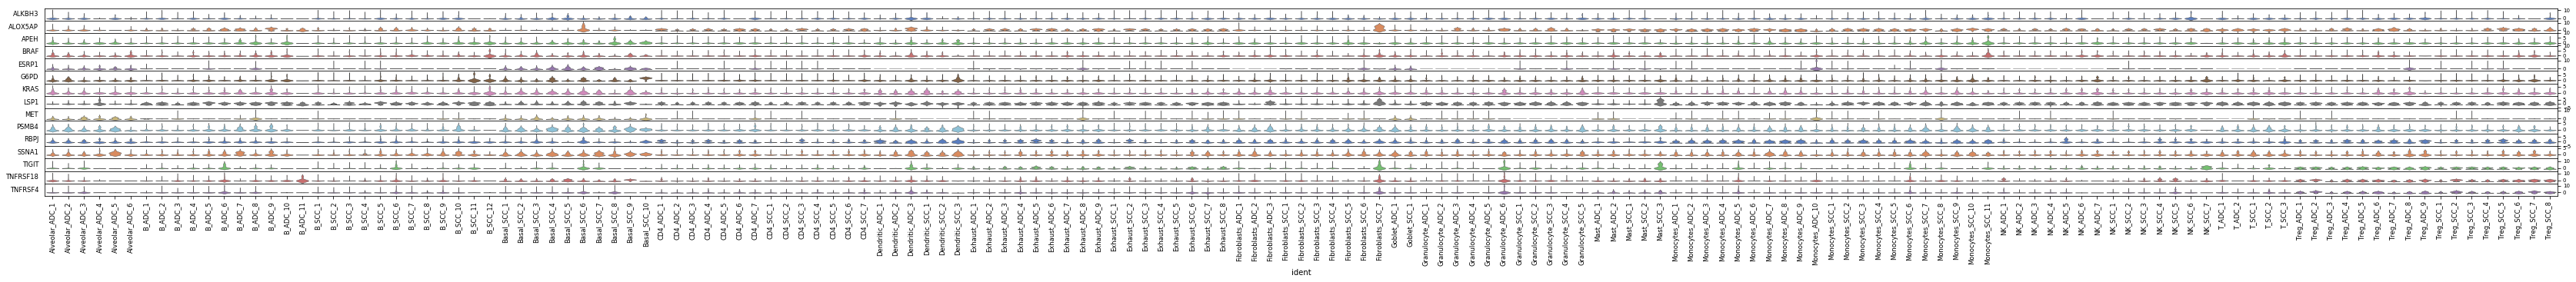

In [89]:
sc.pl.stacked_violin(
    adata, 
    var_names=sorted(genes.loc[genes["matters"] == 1, :]["Symbol"]), 
    groupby="ident", 
    log=False,
    swap_axes = True,
    save=".pdf"
)

In [ ]:
sc.pl.matrixplot(
    adata, 
    var_names=adata.var_names, 
    groupby="ident", 
    log=False,
    save=".pdf"
)

Make violin plot, only take top10 clusters

In [107]:
def get_mean_expression(adata):
    u"""
    Calculate the mean expression value from different cells types each genes
    :param adata
    """
    grouped_cells = {}
    for cell, row in adata.obs.iterrows():
        temp = grouped_cells.get(row["ident"], [])
        temp.append(cell)
        grouped_cells[row["ident"]] = temp
    
    res = {}
    temp_data = adata.to_df().transpose()
    for gene, row in temp_data.iterrows():
        temp = res.get(gene, {})
        for ident, cells in grouped_cells.items():
            temp[ident] = {
                "cells": cells,
                "value": (temp_data.loc[gene, cells].median() + temp_data.loc[gene, cells].mean()) / 2
            }
        res[gene] = temp
    return res

mean_each_clt_gene = get_mean_expression(adata)
# seaborn.violinplot(x=None, y=None, hue=None, data=None, order=None, ax=None)

In [108]:
def get_top_n_clusters_per_gene(data, top=10):
    u"""
    get top n clt per gene based on mean of expression
    :param data: output of get_mean_expression
    :param top: number 
    """

    res = {}
    
    for gene, temp_data in data.items():
        temp = [[x, y["value"]] for x, y in temp_data.items()]
        temp = sorted(temp, key=lambda x: x[1], reverse = True)
        
        res[gene] = []
        for i in temp[:min(top, len(temp))]:
            res[gene].append([i[0], data[gene][i[0]]["cells"]])
            
    return res

# for i, j in mean_each_clt_gene.items():
#     print(i)
    
#     for x,y in j.items():
#         print(x, y["mean"])
#     break

top_each_clt_gene = get_top_n_clusters_per_gene(mean_each_clt_gene)

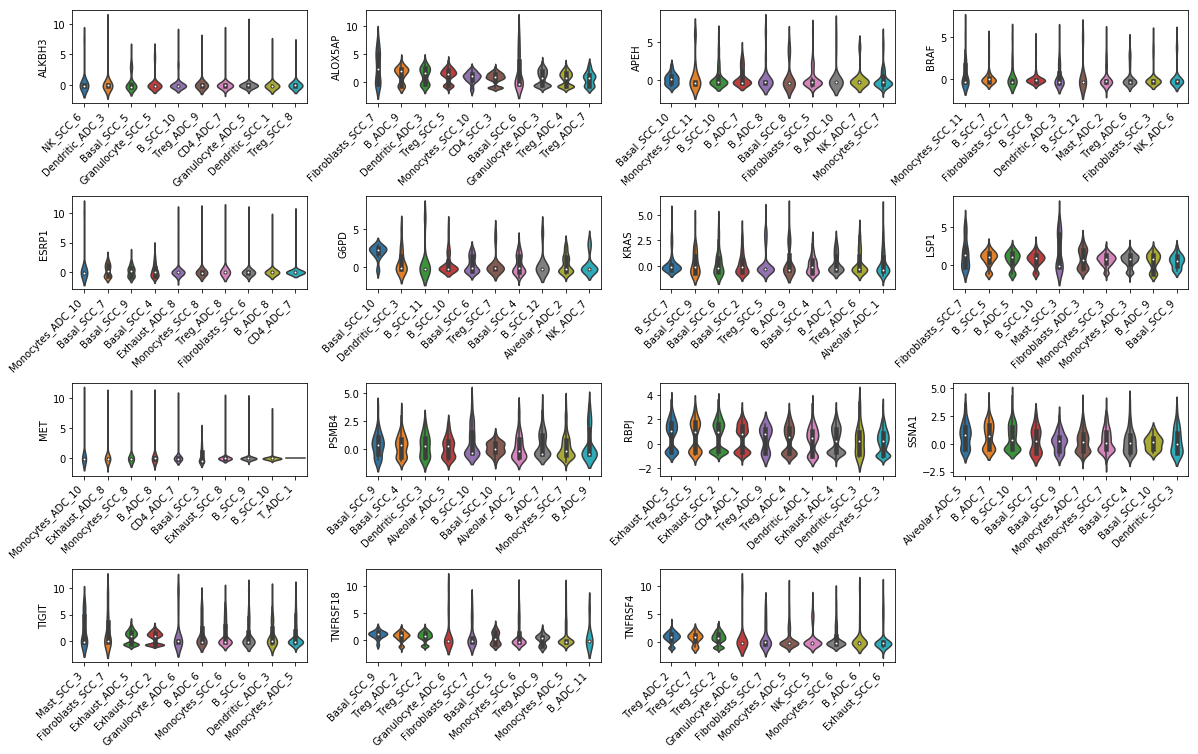

In [115]:
def make_plots(data, adata, ncol=4, var_names=None, output=None):
    u"""
    make violin plots
    """
        
    keys = sorted(data.keys())
    
    if var_names:
        keys = sorted(set(keys) & set(var_names))
    
    temp_data = adata.to_df()
    
    nrow = math.ceil(len(keys) / ncol)
    
    fig = plt.figure(figsize=(5 * ncol, 3 * nrow))
    gs = gridspec.GridSpec(nrow, ncol)
    
    for idx, key in enumerate(keys):
        
        curr_row = idx // ncol
        curr_col = idx % ncol
        curr_ax = plt.subplot(gs[curr_row, curr_col])
        
        df = []
        for clt, cells in data[key]:
            for c in cells:
                df.append([key, clt, temp_data.loc[c, key]])
         
        df = pd.DataFrame(df)
        df.columns = ["Gene", "Cluster", "value"]
                
        sns.violinplot(x="Cluster", y="value", data=df, ax=curr_ax)
        
        plt.xticks(rotation=45, horizontalalignment='right')
        plt.xlabel('')
        plt.ylabel(key)
        
    plt.subplots_adjust(wspace=0.25, hspace = 1)
    
    if output:
        plt.savefig(output, dpi = 600)
    else:
        plt.show()
                
make_plots(
    top_each_clt_gene, 
    adata, 
    var_names=list(genes.loc[genes["matters"] == 1, :]["Symbol"]), 
    output="/mnt/raid62/Lung_cancer_10x/07_gene_drug/figures/violin_plots_selected_genes.png"
)

print all top 10 clusters

In [118]:
clts = set()
for key in genes.loc[genes["matters"] == 1, :]["Symbol"]:
    value = top_each_clt_gene[key]
    for i in value:
        clts.add(i[0])

for i in sorted(clts):
    print(i)

Alveolar_ADC_1
Alveolar_ADC_2
Alveolar_ADC_5
B_ADC_10
B_ADC_11
B_ADC_5
B_ADC_6
B_ADC_7
B_ADC_8
B_ADC_9
B_SCC_10
B_SCC_11
B_SCC_12
B_SCC_5
B_SCC_6
B_SCC_7
B_SCC_8
B_SCC_9
Basal_SCC_10
Basal_SCC_2
Basal_SCC_3
Basal_SCC_4
Basal_SCC_5
Basal_SCC_6
Basal_SCC_7
Basal_SCC_8
Basal_SCC_9
CD4_ADC_1
CD4_ADC_7
CD4_SCC_3
Dendritic_ADC_1
Dendritic_ADC_3
Dendritic_SCC_1
Dendritic_SCC_3
Exhaust_ADC_4
Exhaust_ADC_5
Exhaust_ADC_8
Exhaust_SCC_2
Exhaust_SCC_6
Exhaust_SCC_8
Fibroblasts_ADC_3
Fibroblasts_SCC_3
Fibroblasts_SCC_5
Fibroblasts_SCC_6
Fibroblasts_SCC_7
Granulocyte_ADC_3
Granulocyte_ADC_5
Granulocyte_ADC_6
Granulocyte_SCC_5
Mast_ADC_2
Mast_SCC_3
Monocytes_ADC_10
Monocytes_ADC_3
Monocytes_ADC_5
Monocytes_ADC_7
Monocytes_SCC_10
Monocytes_SCC_11
Monocytes_SCC_3
Monocytes_SCC_6
Monocytes_SCC_7
Monocytes_SCC_8
NK_ADC_6
NK_ADC_7
NK_SCC_5
NK_SCC_6
T_ADC_1
Treg_ADC_2
Treg_ADC_4
Treg_ADC_6
Treg_ADC_7
Treg_ADC_8
Treg_ADC_9
Treg_SCC_2
Treg_SCC_5
Treg_SCC_7
Treg_SCC_8


re-calculate TCGA survival

In [129]:
luad = pd.read_csv("/mnt/raid62/Lung_cancer_10x/TCGA/LUAD_survival.csv", index_col=0)
lusc = pd.read_csv("/mnt/raid62/Lung_cancer_10x/TCGA/LUSC_survival.csv", index_col=0)

In [138]:
def read_cluster_module(path):
    
    new_path = path.replace("paga", "cluster_gene_module/results.xlsx")
    
    if not os.path.exists(new_path):
        return None
    
    labels = os.path.basename(os.path.dirname(path)).split("_")
    data = pd.read_excel(new_path)
    data["cell"] = ["_".join([labels[0], labels[-1]]) for x in range(data.shape[0])]
    
    return data
    

clt_modules = []
with Pool(n_jobs) as p:
    for i in p.map(read_cluster_module, files):
        if i is not None:
            clt_modules.append(i)
            
clt_modules = pd.concat(clt_modules)

/home/zhangyiming/.local/share/virtualenvs/scanpy-UGAxTWFP/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [139]:
clt_modules.head()

,avg_logFC,cell,gene,gene_module_id,ident,p_val,p_val_adj,pct.1,pct.2
0,1.923103,Monocytes_ADC,FABP4,NaN,1.0,0.0,0.0,0.517,0.059
1,1.082928,Monocytes_ADC,MCEMP1,NaN,1.0,0.0,0.0,0.783,0.230
2,1.058208,Monocytes_ADC,MARCO,NaN,1.0,0.0,0.0,0.912,0.384
3,0.978748,Monocytes_ADC,CES1,NaN,1.0,0.0,0.0,0.526,0.097
4,0.717828,Monocytes_ADC,AC026369.3,NaN,1.0,0.0,0.0,0.408,0.051


Match cluster, cluster module and gene

In [164]:
clt_modules_adc = clt_modules.loc[[x.endswith("ADC") for x in clt_modules["cell"]], :]
clt_modules_adc = clt_modules_adc.merge(luad, on="gene")

clt_modules_scc = clt_modules.loc[[x.endswith("SCC") for x in clt_modules["cell"]], :]
clt_modules_scc = clt_modules_scc.merge(lusc, on="gene")
clt_modules_scc = clt_modules_scc.dropna(subset=['avg_logFC'])

In [167]:
def make_violin_survival_plots(data, ncol=4, output = False):
    u"""
    make survival plots
    """
    keys = sorted(set(data["cell"]))
    
    nrow = math.ceil(len(keys) / ncol)
    
    fig = plt.figure(figsize=(5 * ncol, 3 * nrow))
    gs = gridspec.GridSpec(nrow, ncol)
    
    for idx, key in enumerate(keys):
        
        curr_row = idx // ncol
        curr_col = idx % ncol
        curr_ax = plt.subplot(gs[curr_row, curr_col])
        
         
        df = data.loc[[x == key for x in data["cell"]], :]
        df["ident"] = [str(int(x)) for x in df["ident"]]
        
        order = df.groupby("ident").mean().sort_values("high", ascending=False).index
                
        sns.violinplot(x="ident", y="high", data=df, ax=curr_ax, order = order)
        
#         plt.xticks(rotation=45, horizontalalignment='right')
        plt.xlabel('')
        plt.ylabel(key)
        
    plt.subplots_adjust(wspace=0.25, hspace = 0.2)
    
    if output:
        plt.savefig(output, dpi = 600)
    else:
        plt.show()

/home/zhangyiming/.local/share/virtualenvs/scanpy-UGAxTWFP/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


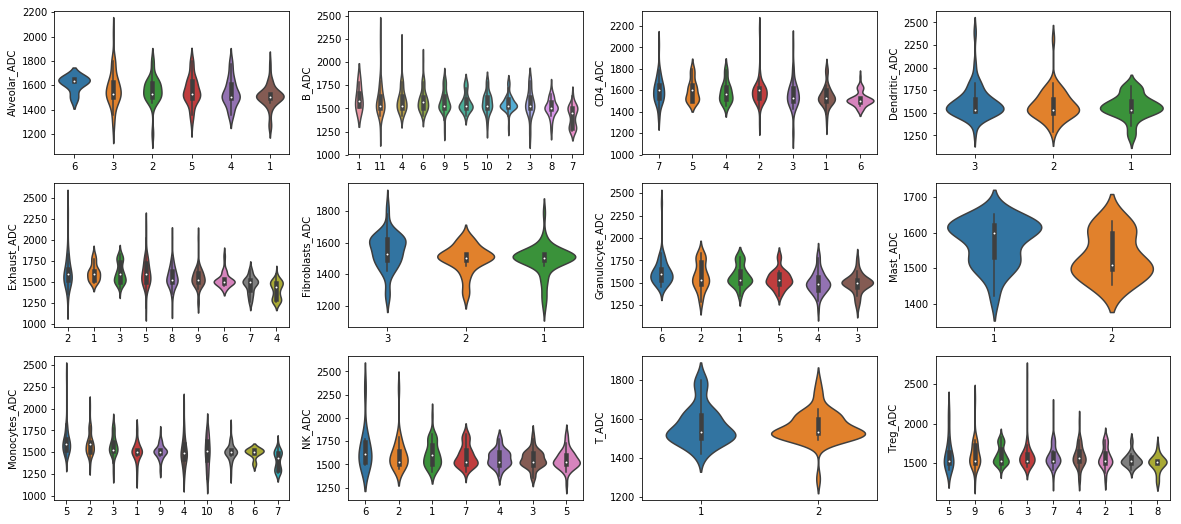

In [169]:
make_violin_survival_plots(
    clt_modules_adc,
    output="/mnt/raid62/Lung_cancer_10x/07_gene_drug/figures/violin_plots_luad_surv.png"
)

/home/zhangyiming/.local/share/virtualenvs/scanpy-UGAxTWFP/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


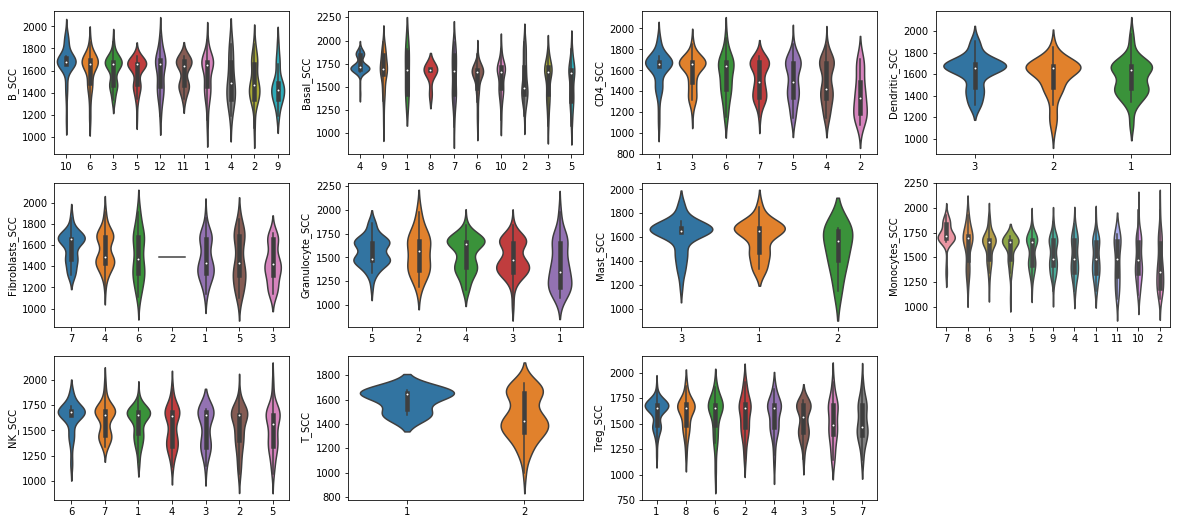

In [170]:
make_violin_survival_plots(
    clt_modules_scc,
    output="/mnt/raid62/Lung_cancer_10x/07_gene_drug/figures/violin_plots_lusc_surv.png"
)

In [163]:
clt_modules_scc.head()

,avg_logFC,cell,gene,gene_module_id,ident,p_val,p_val_adj,pct.1,pct.2,high,low,pvalue
0,NaN,Exhaust_SCC,ACP5,2.0,NaN,NaN,NaN,NaN,NaN,1679.0,1426,0.520
1,0.897404,Treg_SCC,ACP5,NaN,2.0,2.033686e-67,3.513599e-63,0.444,0.175,1679.0,1426,0.520
2,0.889073,B_SCC,ACP5,NaN,5.0,5.061001e-68,8.743891e-64,0.546,0.171,1679.0,1426,0.520
3,0.633525,Monocytes_SCC,ACP5,NaN,4.0,4.866281e-60,8.407474e-56,0.828,0.649,1679.0,1426,0.520
4,NaN,Exhaust_SCC,ACTB,1.0,NaN,NaN,NaN,NaN,NaN,1656.0,1655,0.094
